**Polynomial Regression**

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sal_data = pd.read_csv('Sales_dataset.csv')
print(sal_data)


      Depatment  WorkedHours  Certification  YearsExperience  Salary
0   Development         2300              0              1.1   39343
1       Testing         2100              1              1.3   46205
2   Development         2104              2              1.5   37731
3   UX Designer         1200              1              2.0   43525
4       Testing         1254              2              2.2   39891
5   UX Designer         1236              1              2.9   56642
6   Development         1452              2              3.0   60150
7       Testing         1789              1              3.2   54445
8   UX Designer         1645              1              3.2   64445
9   UX Designer         1258              0              3.7   57189
10      Testing         1478              3              3.9   63218
11  Development         1257              2              4.0   55794
12  Development         1596              1              4.0   56957
13      Testing         1256      

In [3]:
from IPython.display import display
X = sal_data.iloc[:,0:4]
Y = sal_data.iloc[:,4]
X=pd.get_dummies(X)
display(X)

,WorkedHours,Certification,YearsExperience,Depatment_Development,Depatment_Testing,Depatment_UX Designer
0,2300,0,1.1,1,0,0
1,2100,1,1.3,0,1,0
2,2104,2,1.5,1,0,0
3,1200,1,2.0,0,0,1
4,1254,2,2.2,0,1,0
5,1236,1,2.9,0,0,1
6,1452,2,3.0,1,0,0
7,1789,1,3.2,0,1,0
8,1645,1,3.2,0,0,1
9,1258,0,3.7,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.33,random_state=0)
model=LinearRegression()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
print("Training Score",model.score(X_train,Y_train))
print("Test Score",model.score(X_test,Y_test))
print('R2 Score ',r2_score(Y_test,Y_predict))


Training Score 0.9451626273970442
Test Score 0.9660078840971882
R2 Score  0.9660078840971882


**Backward Elimination**

In [5]:
X=np.append(arr=np.ones((30,1)).astype(np.int),values=X,axis=1)

In [6]:
print(X.shape)

(30, 7)


In [7]:
New_X=X[:,[0,1,2,3,4,5]]
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
obj = sm.OLS(endog=Y,exog=New_X).fit()

In [9]:
obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     117.2
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           4.71e-16
Time:                        08:58:42   Log-Likelihood:                -300.09
No. Observations:                  30   AIC:                             612.2
Df Residuals:                      24   BIC:                             620.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.155e+04   4545.270      4.742      0.000    1.22e+04    3.09e+04
x1             3.3361      2.410      1.384      0.179      -1.637       8.310
x2          -423.7607   1282.271     -0.330      0.744   -3070.237    2222.716
x3          9437.2530    510.978     18.469      0.000    8382.645    1.05e+04
x4           -92.8656   2735.524     -0.034      0.973   -5738.710    5552.978
x5         -1514.2911   2724.621     -0.556      0.584   -7137.633    4109.050
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.629
Skew:                           0.414   Prob(JB):                        0.443
Kurtosis:                       2.214   Cond. No.                     7.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
New_X=X[:,[0,1,2,3,4]]

In [11]:
obj = sm.OLS(endog=Y,exog=New_X).fit()

In [12]:
obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     150.6
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           4.15e-17
Time:                        08:58:42   Log-Likelihood:                -300.28
No. Observations:                  30   AIC:                             610.6
Df Residuals:                      25   BIC:                             617.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.109e+04   4404.564      4.787      0.000     1.2e+04    3.02e+04
x1             3.0894      2.336      1.323      0.198      -1.721       7.900
x2          -421.0364   1264.414     -0.333      0.742   -3025.145    2183.072
x3          9459.4775    502.321     18.832      0.000    8424.929    1.05e+04
x4           693.1138   2309.021      0.300      0.767   -4062.404    5448.632
==============================================================================
Omnibus:                        1.658   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.413
Skew:                           0.380   Prob(JB):                        0.493
Kurtosis:                       2.256   Cond. No.                     7.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
New_X=X[:,[0,1,2,3]]

In [14]:
obj = sm.OLS(endog=Y,exog=New_X).fit()

In [15]:
obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     208.1
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.74e-18
Time:                        08:58:42   Log-Likelihood:                -300.34
No. Observations:                  30   AIC:                             608.7
Df Residuals:                      26   BIC:                             614.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e+04   4255.851      5.010      0.000    1.26e+04    3.01e+04
x1             3.1430      2.288      1.374      0.181      -1.559       7.845
x2          -436.2151   1241.098     -0.351      0.728   -2987.329    2114.899
x3          9446.6811    491.673     19.213      0.000    8436.033    1.05e+04
==============================================================================
Omnibus:                        1.432   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.349
Skew:                           0.431   Prob(JB):                        0.509
Kurtosis:                       2.421   Cond. No.                     7.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
New_X=X[:,[3]]

In [17]:
obj = sm.OLS(endog=Y,exog=New_X).fit()

In [18]:
obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    2.56e-24
Time:                        08:58:42   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(New_X,Y,test_size =0.33,random_state=0)
model=LinearRegression()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
print("Training Score",model.score(X_train,Y_train))
print("Test Score",model.score(X_test,Y_test))
print('R2 Score ',r2_score(Y_test,Y_predict))

Training Score 0.9381900012894278
Test Score 0.9749154407708353
R2 Score  0.9749154407708353


**Polynomial Regression**

In [20]:
ploy=PolynomialFeatures(degree=3)
poly_X=ploy.fit_transform(New_X)
model2=LinearRegression()
model2.fit(poly_X,Y)
Y_predict=model2.predict(poly_X)
print("Score",model2.score(poly_X,Y))

Score 0.9635969766249464


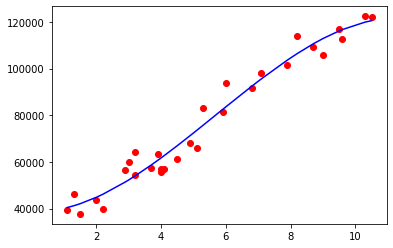

In [21]:
plt.scatter(New_X,Y,c='red')
plt.plot(New_X,Y_predict,c='blue')
plt.show()